In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

# Graficas de color naranja representan LESIONES y las rojas los HOMICIDIOS

Los datos presentados como SD se entienden como SIN DATOS y son interpretados por mi como outliers ya que no aportan un valor real a el analisis , pero dependiendo a la grafica se puede intuir el valor de los SD, como por ejemplo que se encuentran principalmente en lesiones, intuyendo la falta de interes al documeentar este tipo de sucesos

# LESIONES

In [2]:


# Lee todas las hojas del archivo Excel y guarda cada hoja en un diccionario
diccionario_de_hojas = pd.read_excel('lesiones.xlsx', sheet_name=None)

# Ahora, cada clave del diccionario es el nombre de la hoja y el valor es el DataFrame correspondiente a esa hoja.
# Puedes acceder a cada DataFrame por su nombre de hoja, por ejemplo:
df_hoja1 = diccionario_de_hojas['HECHOS']
df_hoja2 = diccionario_de_hojas['VICTIMAS']



In [52]:
df_hoja1

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [4]:
df_hoja2

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


HECHOS DF1

In [8]:
year = df_hoja1['aaaa'].value_counts()
df = pd.DataFrame(year)
df

,count
aaaa,
2019,10073
2021,7726
2020,5986


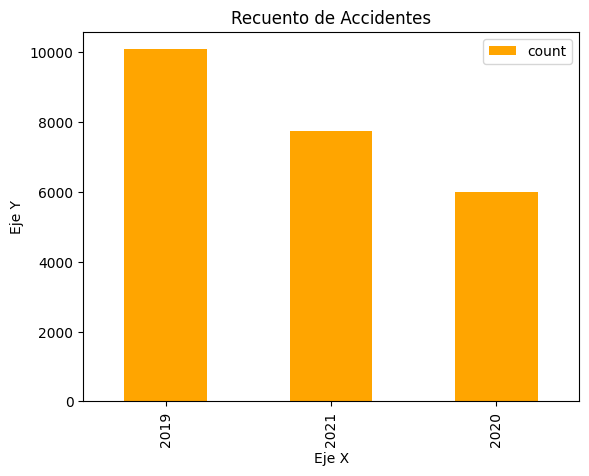

In [11]:
df.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Recuento de Accidentes')

plt.legend()

plt.show()

Se puede ver la cantidad de lesionados por año,tambien muestra una disminucion de lesionados, la conclusion que se da es que la causa es la pandemia y los confinamientos provocaron ese descenso

In [3]:
edad = df_hoja2['EDAD_VICTIMA'].value_counts()
edad2 = edad.head(15)

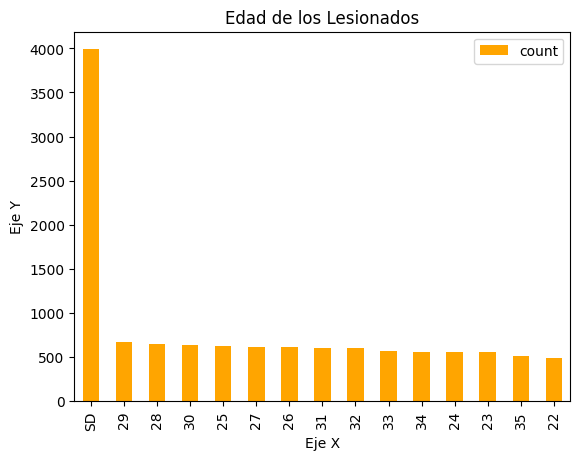

In [4]:
edad2.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Edad de los Lesionados')

plt.legend()

plt.show()

Se pueden ver la edad de las personas con mas lesiones donde los primeros lugares podemos ver a personas de entre 20 a 34 años

In [6]:
type = df_hoja1['victima'].value_counts()

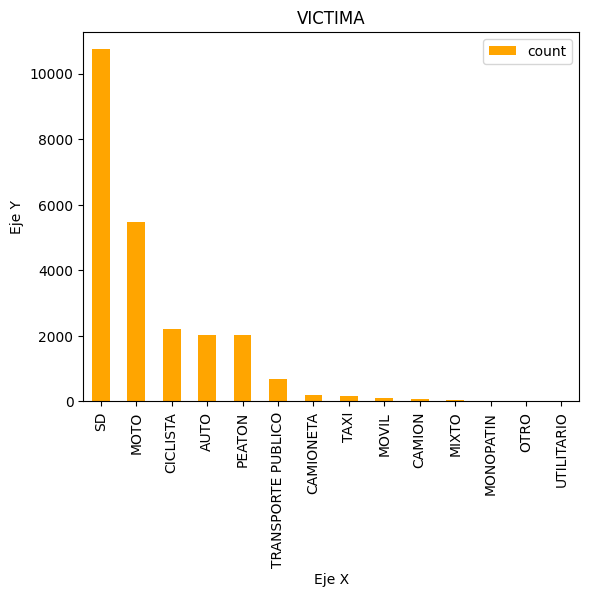

In [8]:
type.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('VICTIMA')

plt.legend()

plt.show()

Las personas con mas lesiones eran conductores de vehiculos de 2 ruedas, seguido de automivilistes y peatones, demostrando el peligro de los vehiculos de 2 ruedas

In [9]:
acuse = df_hoja1['acusado'].value_counts()

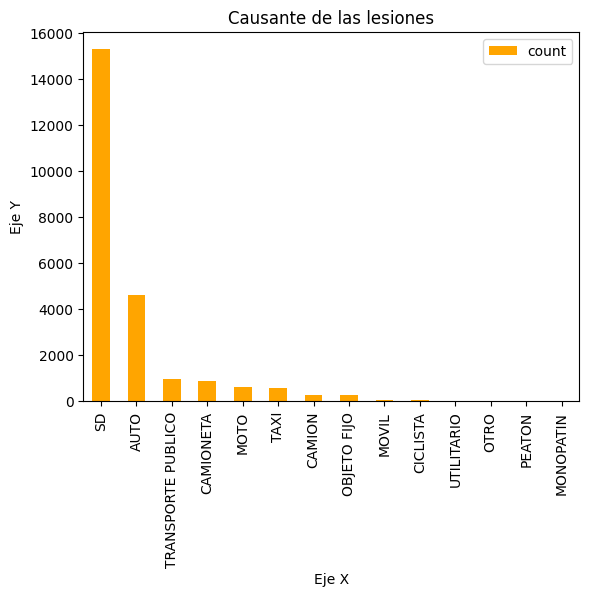

In [10]:
acuse.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Causante de las lesiones')

plt.legend()

plt.show()

En esta grafica se pueden ver las lesiones que se recibieron por causas de 3ros en este caso los causantes de lesiones son el AUTOMOVIL y transporte publico, la conclusion es que los automoviles le causaron accidentes a los vehiculos de 2 ruedas de la grafica anterior principalmente.

In [17]:
gravedad = df_hoja1['gravedad'].value_counts()

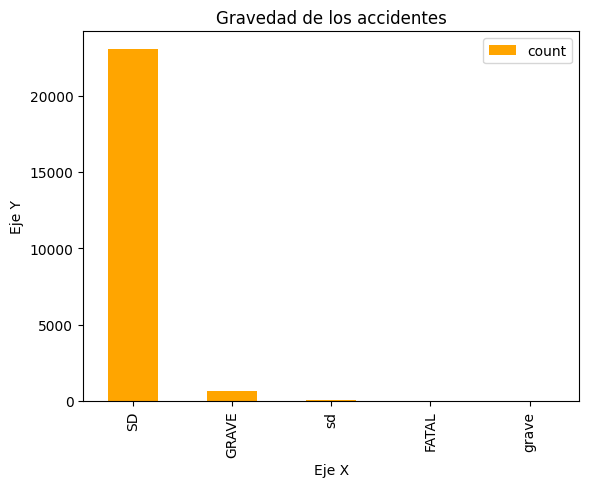

In [18]:
gravedad.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gravedad de los accidentes')

plt.legend()

plt.show()

En esta grafica prevalece el SD que es interpretado como SIN DATOS, asi como la clasificacion de este dataset interpretando SD como elementos que no fueron graves osea lesiones, asi que se puede interpretar como muchos lesionados sin gravedad

In [19]:
time = df_hoja1['franja_hora'].value_counts()
time2 = pd.DataFrame(time)

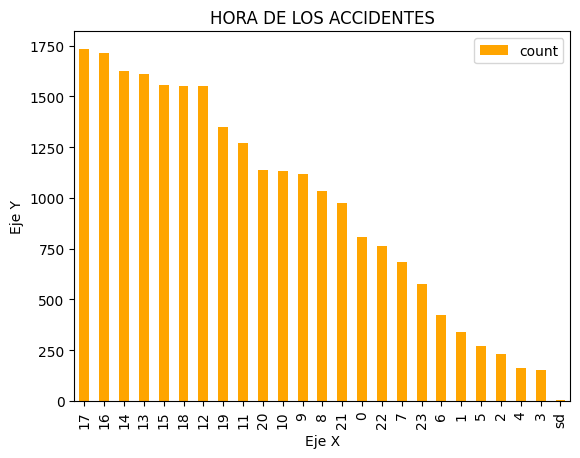

In [20]:
time.plot(kind='bar', color='orange')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('HORA DE LOS ACCIDENTES')

plt.legend()

plt.show()

En el anterior grafico podemos ver la hora principal de los accidentes que en este caso seria desde las 10:00 hrs a las 20:00 hrs, mosrando de las 14hrs a las 17 hrs como las horas principales en la que ocurren  lesiones viales

# HOMICIDIOS

In [3]:
# Lee todas las hojas del archivo Excel y guarda cada hoja en un diccionario
diccionario_de_hojas = pd.read_excel('homicidios.xlsx', sheet_name=None)

# Ahora, cada clave del diccionario es el nombre de la hoja y el valor es el DataFrame correspondiente a esa hoja.
# Puedes acceder a cada DataFrame por su nombre de hoja, por ejemplo:
df_hoja3 = diccionario_de_hojas['HECHOS']
df_hoja4 = diccionario_de_hojas['VICTIMAS']

In [43]:
df_hoja3.head(5)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [44]:
df_hoja4.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [4]:
anio = df_hoja3['AAAA'].value_counts()

Text(0.5, 1.0, 'Año de los homicidios')

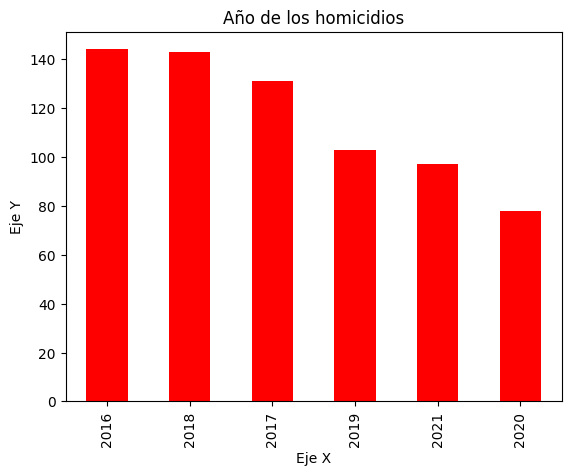

In [5]:
anio.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Año de los homicidios')

En la grafica anterior podemos ver la cantidad de homicidios por año de la ciudad de buenos aires, sacando la conclusion que disminuyo por causa de la pandemia

In [50]:
hora= df_hoja3['HH'].value_counts()

Text(0.5, 1.0, 'HORA de los homicidios')

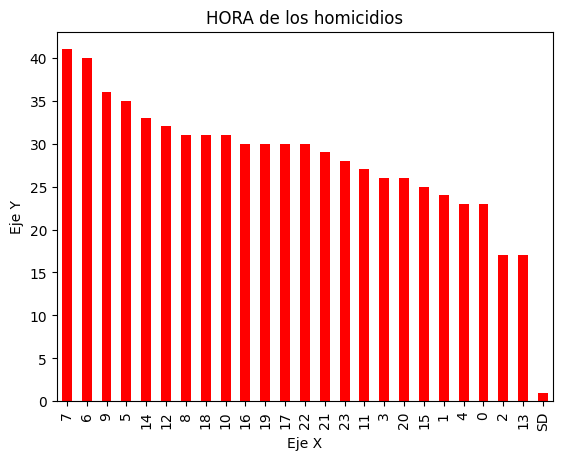

In [52]:
hora.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('HORA de los homicidios')

En est grafica podemor ver como las horas principales de los homicidios fue de las 5 a 10 hrs de la mañana, haciendo la exepcion de las 12 a 4 p.m. como las horas del dia mas peligrosas

In [55]:
involucrado = df_hoja3['PARTICIPANTES'].value_counts()
involucrado2 = involucrado.head(15)

Text(0.5, 1.0, 'Involucrado en los homicidios')

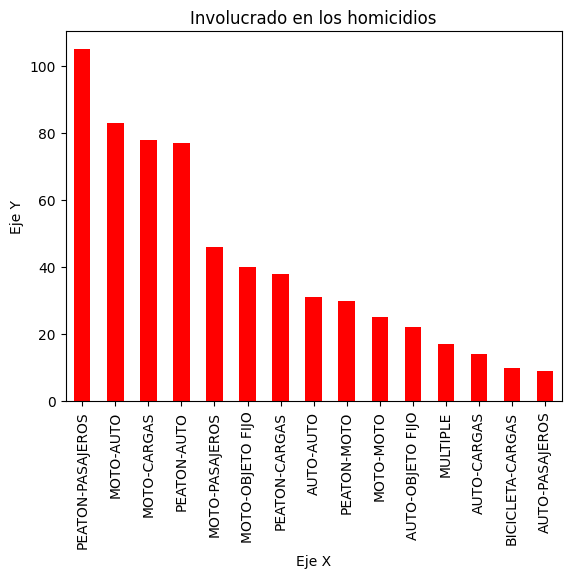

In [58]:
involucrado2.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Involucrado en los homicidios')

En los homicidios destacan los petatones como involucrados en los homicidios, mostrando que estos homicidios sucedieron en calles transitadas

In [60]:
acusado = df_hoja3['ACUSADO'].value_counts()
acusado2 = acusado.head(15)

Text(0.5, 1.0, 'Acusado en los homicidios')

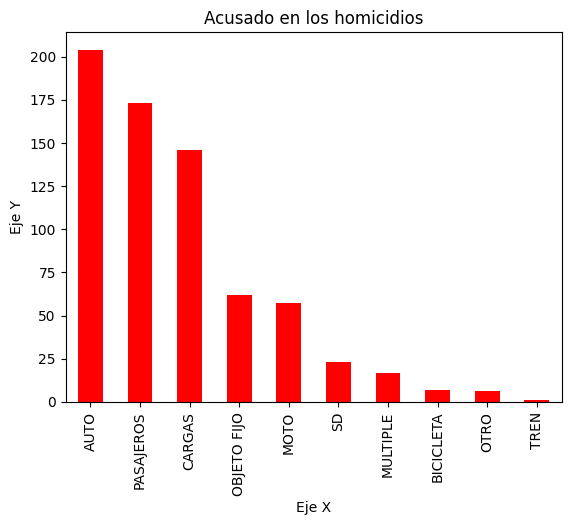

In [62]:
acusado2.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Acusado en los homicidios')

Los acusados principales de estos homicidios son AUTOMOVILES y pasajeros de algun transporte, mostrando que en estos homicidios se buscaba tener un medio de escape a la hora de cometer un crimen, aunque como se ve en la grafica no esta excento de vehiculos como la bicicleta que muestra la tranquilidad con la que se cometen estos crimenes 

In [63]:
victima = df_hoja3['VICTIMA'].value_counts()
victima2 = victima.head(15)

Text(0.5, 1.0, 'Victima en los homicidios')

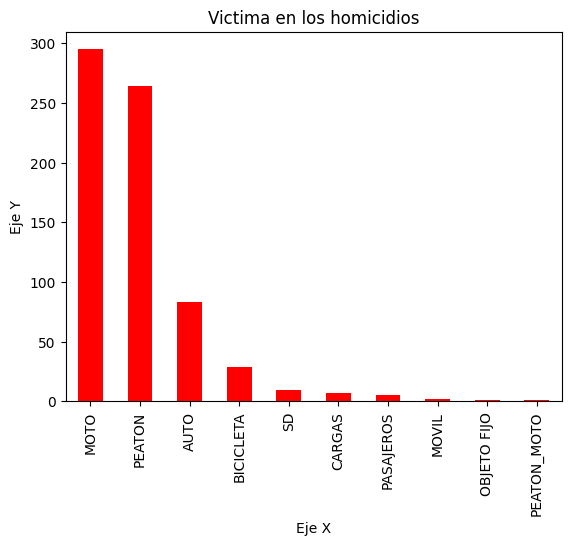

In [64]:
victima2.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Victima en los homicidios')

Las principales victimas en los homicidios por alguna razon manejaban motocicleta seguida de los peatones y al final por autos, lo que demuestra que las victimas son esperadas al aire libre para ser asesinadas

In [67]:
lugarh2 = df_hoja3['TIPO_DE_CALLE'].value_counts()


Text(0.5, 1.0, 'Lugar de los homicidios')

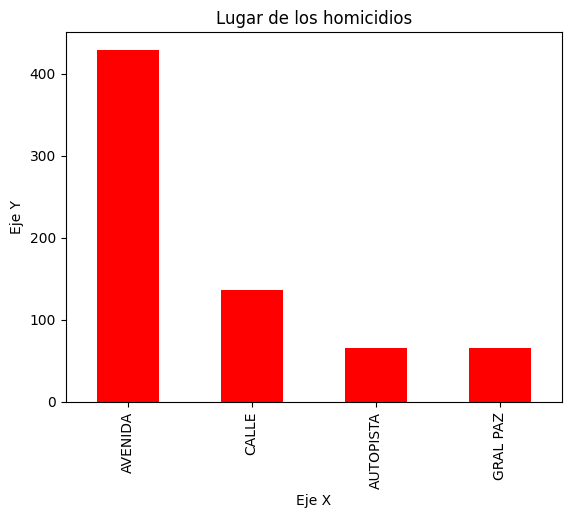

In [68]:
lugarh2.plot(kind='bar', color='red')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Lugar de los homicidios')

En la grafica se muestra que principalmente son asesinados en avenidas preferentemente a las calles puede ser por que hay menos trafico de personas

# Cantidad de HOMICIDIOS cada 500000 habitantes

se tomo cada 500000 habitantes ya que el dataset mostraba tan pocos homicidios que se tuvo que aumentar el calculo para mostrar un resultado significativo, se sospecha que le faltaron datos a el dataset, al hacer el calculo y compararlo con algo oficial

In [4]:
num2020 = df_hoja3[df_hoja3['AAAA'] == 2020]
t2020 = num2020['AAAA'].value_counts()

In [5]:
t2020

AAAA
2020    78
Name: count, dtype: int64

para el valor z se tomo la poblacion total de buenos aires, y asi se hizo el calculo

In [21]:
z = 17541141

In [22]:
x = t2020 / z
y = x * 500000
y

AAAA
2020    2.223345
Name: count, dtype: float64

POR CADA 500000 habitantes se registraron 2 homicidios en la ciudad de BUENOS AIRES segun el Dataset

In [36]:
w =  [500000,2]

In [24]:
nombres = ['poblacion total', 'homicidios']

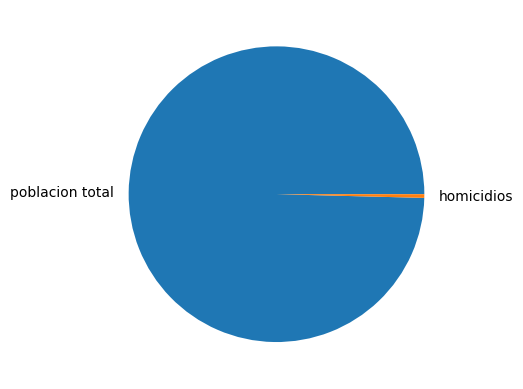

In [37]:
plt.pie(w, labels=nombres)
plt.show()